In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


Epoch 1/50
800/800 [==============================] - 73s 90ms/step - loss: 4.0624 - accuracy: 0.0744 - val_loss: 3.6518 - val_accuracy: 0.1360
Epoch 2/50
800/800 [==============================] - 71s 89ms/step - loss: 3.4207 - accuracy: 0.1759 - val_loss: 3.2766 - val_accuracy: 0.2077
Epoch 3/50
800/800 [==============================] - 70s 88ms/step - loss: 3.0916 - accuracy: 0.2382 - val_loss: 3.0643 - val_accuracy: 0.2409
Epoch 4/50
800/800 [==============================] - 72s 90ms/step - loss: 2.8588 - accuracy: 0.2804 - val_loss: 2.9212 - val_accuracy: 0.2767
Epoch 5/50
800/800 [==============================] - 70s 88ms/step - loss: 2.6739 - accuracy: 0.3201 - val_loss: 2.8068 - val_accuracy: 0.3007
Epoch 6/50
800/800 [==============================] - 71s 89ms/step - loss: 2.5181 - accuracy: 0.3496 - val_loss: 2.7196 - val_accuracy: 0.3122
Epoch 7/50
800/800 [==============================] - 70s 88ms/step - loss: 2.3721 - accuracy: 0.3818 - val_loss: 2.7159 - val_accuracy:

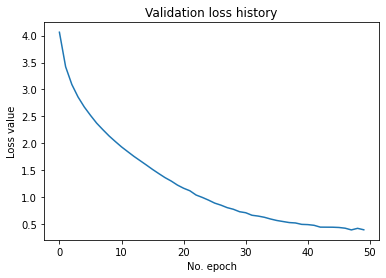

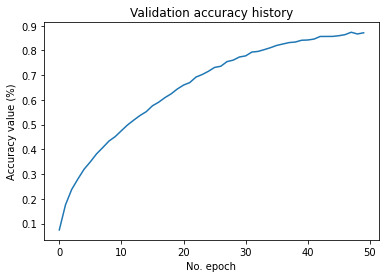

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import time
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 50
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
start = time.time()
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)
end = time.time()
print(f"time :{end-start}")
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f9465909150>>

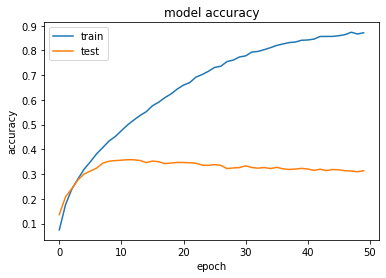

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

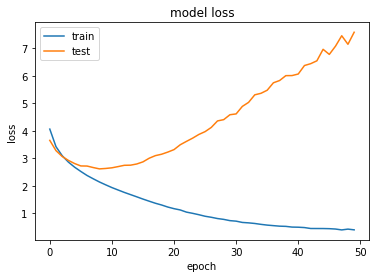

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()